# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import datetime as dt

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('/Users/ludovicschneider/Bootcamp/LS.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
# Print the data to locate the information we need
print(json.dumps(btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18689656,
            "total_supply": 18689656,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 50783.0,
                    "volume_24h": 89838855537,
                    "market_cap": 947471765954,
                    "percentage_change_1h": 0.102114848425572,
                    "percentage_change_24h": -2.60775639616774,
                    "percentage_change_7d": -17.4217690295775,
                    "percent_change_1h": 0.102114848425572,
                    "percent_change_24h": -2.60775639616774,
                    "percent_change_7d": -17.4217690295775
                }
            },
            "last_updated": 1619223526
        }
    },
    "metadata": {
        "timestamp": 1619223526,
        "num_cry

In [6]:
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
# Print the data to locate the information we need
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 115593273,
            "total_supply": 115593273,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 2337.75,
                    "volume_24h": 67893892378,
                    "market_cap": 269922940092,
                    "percentage_change_1h": -0.157270909236549,
                    "percentage_change_24h": -3.66640759485072,
                    "percentage_change_7d": -3.58013882969837,
                    "percent_change_1h": -0.157270909236549,
                    "percent_change_24h": -3.66640759485072,
                    "percent_change_7d": -3.58013882969837
                }
            },
            "last_updated": 1619223508
        }
    },
    "metadata": {
        "timestamp": 1619223508,
        "nu

In [7]:
# Compute current value of my crpto
btc_price = btc_data['data']['1']['quotes']['USD']['price']
my_btc_value = my_btc * btc_price
my_btc_value

60939.6

In [8]:
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
my_eth_value = my_eth * eth_price
my_eth_value

12390.074999999999

In [9]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $60939.60
The current value of your 5.3 ETH is $12390.07


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(type(alpaca_api_key))
print(type(alpaca_secret_key))

<class 'str'>
<class 'str'>


In [12]:
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = 'v2'
)

In [13]:
# Automate the today date to match the crypto extraction which will be updated each time we re-run the code
today_date = dt.datetime.today().strftime("%Y/%m/%d/")

# Format current date as ISO format
today = pd.Timestamp(today_date, tz='America/New_York').isoformat()


In [14]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_classic_portfolio = api.get_barset(
    tickers,
    timeframe,
    start= today,
    end= today,
).df

# Preview DataFrame
df_classic_portfolio.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2021-04-23 00:00:00-04:00  114.81  115.086  114.6415  114.75  3506457  412.87   

                                                             
                             high     low   close    volume  
time                                                         
2021-04-23 00:00:00-04:00  418.25  412.79  416.72  62186191

In [15]:
# Pick AGG and SPY close prices
agg_close_price = float(df_classic_portfolio['AGG']['close'])
spy_close_price = float(df_classic_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.75
Current SPY closing price: $416.72


In [16]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $22950.00
The current value of your 50 SPY shares is $20836.00


### Savings Health Analysis

In [17]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame

value_portfolio = {
    'crypto': [float(my_btc_value + my_eth_value)],
    'shares': [float(my_agg_value + my_spy_value)],
}

df_savings = pd.DataFrame(value_portfolio)
  
df_savings = df_savings.pivot_table(columns=0).rename(columns={0:'amount'})

# Display savings DataFrame
display(df_savings)

,amount
crypto,73329.675
shares,43786.000


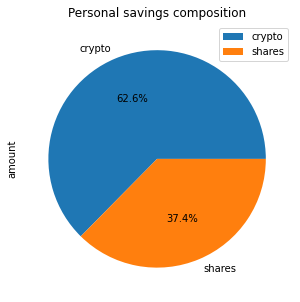

In [18]:
# Plot savings pie chart
savings_plot = df_savings.plot.pie(y='amount', title='Personal savings composition', figsize=(5,5), autopct='%1.1f%%')

In [43]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())
total_savings

# Validate saving health
if total_savings > emergency_fund:
    print(f'Congratulation! You saved an additional ${total_savings - emergency_fund:.2f}'
          f' from your initial target of ${emergency_fund:.2f}')
    
elif total_savings == emergency_fund:
    print(f'Congratulation! You reached your saving goal of ${emergency_fund:.2f}')
    
else:
    shortfall = total_savings - emergency_fund
    print(f'You are missing ${shortfall:.2f} from your target')
    
 


Congratulation! You saved an additional $81115.68 from your initial target of $36000.00


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-04-22', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-23', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start= start_date,
    end= end_date,
    limit=1000
).df
# Display sample data
df_stock_data.tail()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2021-04-19 00:00:00-04:00  114.00  114.500  114.0000  114.44  4820664  416.26   
2021-04-20 00:00:00-04:00  114.42  114.670  114.3900  114.62  3674209  413.91   
2021-04-21 00:00:00-04:00  114.60  114.740  114.5300  114.74  5250384  411.51   
2021-04-22 00:00:00-04:00  114.74  114.800  114.5900  114.77  3518947  415.88   
2021-04-23 00:00:00-04:00  114.81  115.086  114.6415  114.75  3506457  412.87   

                                                               
                               high     low   close    volume  
time                                                           
2021-04-19 00:00:00-04:00  416.7400  413.79  415.24  66226327  
2021-04-20 00:00:00-04:00  415.0859  410.59  412.22  69715050  
2021-04-21 00:00:00-04:00  416.2900  411.36  416.08  54772634  
2021-04-22 00:00:00-04:00  416.7800  411.13  412.30  90086341  
2021-04-23 00:00:00-04:00  418.2500  412.79  416.72  62184753

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30y_60stocks = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [23]:
# Printing the simulation input data
MC_30y_60stocks.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2017-05-04 00:00:00-04:00  108.55  108.70  108.55  108.665  1789624   
2017-05-05 00:00:00-04:00  108.72  108.74  108.57  108.720  1287794   
2017-05-08 00:00:00-04:00  108.63  108.67  108.49  108.495  1579134   
2017-05-09 00:00:00-04:00  108.43  108.51  108.40  108.495  2395343   
2017-05-10 00:00:00-04:00  108.60  108.66  108.44  108.520  1427511   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2017-05-04 00:00:00-04:00          NaN  238.83  238.9225  237.78  238.75   
2017-05-05 00:00:00-04:00     0.000506  239.18  239.7200  238.68  239.72   
2017-05-08 00:00:00-04:00    -0.002070  239.76  239.9200  239.17  239.67   
2017-05-09 00:00:00-04:00     0.000000  239.96  240.1900  239.04  239.46   
2017-05-10 00:00:00-04:00     0.000230  239.38  239.8700  239.15  239.85   

                                                  
                             volume daily_return  
time                                              
2017-05-04 00:00:00-04:00  46170233          NaN  
2017-05-05 00:00:00-04:00  43733544     0.004063  
2017-05-08 00:00:00-04:00  32087919    -0.000209  
2017-05-09 00:00:00-04:00  39723891    -0.000876  
2017-05-10 00:00:00-04:00  34222778     0.001629

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30y_60stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014573,1.008017,0.996299,0.999668,1.004119,1.005195,1.002105,1.007273,1.003034,1.002012,...,0.991903,0.983736,1.000887,0.998574,1.005073,0.997574,1.006304,1.006614,1.007390,0.992885
2,0.997253,1.016537,1.013460,0.999172,0.995587,1.008104,1.000936,1.013500,1.005052,0.995977,...,1.002819,0.986086,1.007740,0.982202,0.991234,0.998294,1.005455,1.007890,1.001519,1.006213
3,0.992217,1.007336,1.013995,0.994110,0.983671,1.008200,1.011447,1.019384,0.997721,1.002970,...,0.995938,0.981870,1.027749,0.985788,0.997757,1.000633,1.002121,0.999485,1.004516,1.010180
4,0.984227,1.002890,1.011537,0.990151,0.973355,1.007060,1.005191,1.011955,0.999164,0.993781,...,0.997578,0.971057,1.035456,0.993009,0.993241,1.011595,0.990196,0.999966,0.987608,1.008505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.556540,25.369692,22.596004,3.409937,38.515507,22.093674,39.846615,8.757449,16.483291,40.081276,...,7.414929,10.997245,10.689805,13.240610,20.931847,7.508808,30.062754,9.803232,14.783043,29.416039
7557,11.396950,25.460432,22.214604,3.398494,38.341050,22.060366,40.157871,8.810162,16.451150,40.474921,...,7.376731,10.964006,10.802088,13.271837,20.970934,7.540414,29.989756,9.813496,15.020646,29.650832
7558,11.448388,25.457225,22.054907,3.368791,38.554250,22.022013,40.162631,8.774901,16.564585,40.111918,...,7.363846,11.030637,10.729282,13.250897,20.953798,7.530331,29.942664,9.777368,14.982198,29.369530
7559,11.400333,25.461450,21.786778,3.347160,38.495850,21.944886,40.014986,8.808994,16.873738,39.865146,...,7.349828,11.132536,10.804669,13.189993,21.003943,7.513558,29.971693,9.773542,14.881925,29.335345


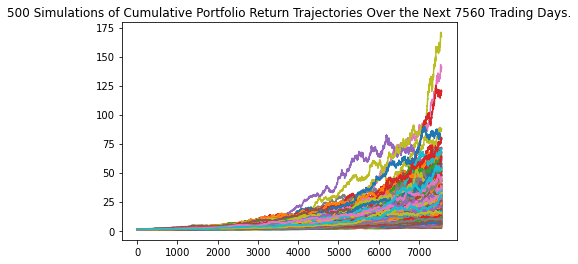

In [25]:
# Plot simulation outcomes
line30_plot = MC_30y_60stocks.plot_simulation()

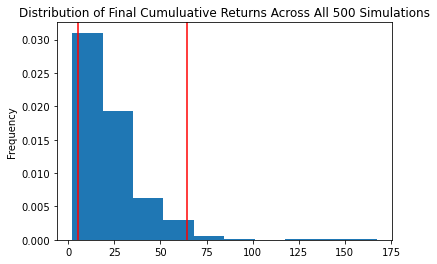

In [26]:
# Plot probability distribution and confidence intervals
dist30_plot = MC_30y_60stocks.plot_distribution()

### Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
summary30_tbl = MC_30y_60stocks.summarize_cumulative_return()

# Print summary statistics
print(summary30_tbl)

count           500.000000
mean             22.884701
std              17.738914
min               2.109852
25%              11.259474
50%              18.072255
75%              28.625762
max             167.149059
95% CI Lower      5.427575
95% CI Upper     64.152433
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_30y = round(summary30_tbl[8]*initial_investment,2)
ci_upper_30y = round(summary30_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower_30y} and ${ci_upper_30y}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within the range of $108551.5 and $1283048.66


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [29]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_30y_new = round(summary30_tbl[8]*initial_investment,2)
ci_upper_30y_new  = round(summary30_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30y_new} and ${ci_upper_30y_new}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $162827.25 and $1924572.99


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# To increase the return over a short period of time, I chose to increase the weight on stocks to 80%

MC_5y_80stocks = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_5y_80stocks.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2017-05-04 00:00:00-04:00  108.55  108.70  108.55  108.665  1789624   
2017-05-05 00:00:00-04:00  108.72  108.74  108.57  108.720  1287794   
2017-05-08 00:00:00-04:00  108.63  108.67  108.49  108.495  1579134   
2017-05-09 00:00:00-04:00  108.43  108.51  108.40  108.495  2395343   
2017-05-10 00:00:00-04:00  108.60  108.66  108.44  108.520  1427511   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2017-05-04 00:00:00-04:00          NaN  238.83  238.9225  237.78  238.75   
2017-05-05 00:00:00-04:00     0.000506  239.18  239.7200  238.68  239.72   
2017-05-08 00:00:00-04:00    -0.002070  239.76  239.9200  239.17  239.67   
2017-05-09 00:00:00-04:00     0.000000  239.96  240.1900  239.04  239.46   
2017-05-10 00:00:00-04:00     0.000230  239.38  239.8700  239.15  239.85   

                                                  
                             volume daily_return  
time                                              
2017-05-04 00:00:00-04:00  46170233          NaN  
2017-05-05 00:00:00-04:00  43733544     0.004063  
2017-05-08 00:00:00-04:00  32087919    -0.000209  
2017-05-09 00:00:00-04:00  39723891    -0.000876  
2017-05-10 00:00:00-04:00  34222778     0.001629

In [31]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5y_80stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005096,0.989623,1.008701,0.999918,0.994464,0.992601,0.994217,1.012899,0.998981,0.999865,...,1.019478,0.992535,1.000833,1.001767,1.022662,1.016649,1.006962,0.991882,1.000224,1.003447
2,0.998110,0.964632,1.030316,1.005995,0.993192,0.995592,0.990729,1.026988,0.995602,0.991546,...,1.026943,0.996564,1.020527,0.998247,1.021311,1.018044,1.013751,0.984815,0.985956,1.011184
3,1.010104,0.967071,1.033632,1.023427,1.008623,1.000155,0.998370,1.034445,0.991021,0.999595,...,1.022974,0.989708,1.014110,0.995989,1.006558,0.994623,1.011350,0.994274,0.983528,1.013404
4,1.016144,0.977997,1.025488,1.013344,1.011559,1.002863,0.999511,1.026876,0.981260,1.004352,...,1.000846,0.981763,1.016830,0.993952,1.016313,0.995962,1.011442,1.003555,0.999659,0.990791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.972655,1.285578,5.528132,0.824444,1.161158,2.730890,1.410866,1.664829,1.831947,2.002846,...,1.820437,3.569418,2.392905,1.490711,1.776477,1.616301,2.847243,1.617008,2.442178,2.494501
1257,2.988181,1.288028,5.567173,0.831297,1.133370,2.728803,1.407496,1.660979,1.847290,2.032407,...,1.794768,3.529583,2.341939,1.496139,1.756233,1.656200,2.881221,1.610655,2.424379,2.460591
1258,2.979519,1.317767,5.539660,0.851289,1.144674,2.771862,1.418931,1.665630,1.885214,2.041417,...,1.776722,3.596931,2.301004,1.475163,1.761424,1.659443,2.900459,1.584975,2.473268,2.463051
1259,2.924003,1.309747,5.523166,0.862449,1.132220,2.757334,1.409069,1.686923,1.865346,2.049584,...,1.807420,3.606742,2.297251,1.456370,1.735804,1.673849,2.913751,1.553507,2.493341,2.492410


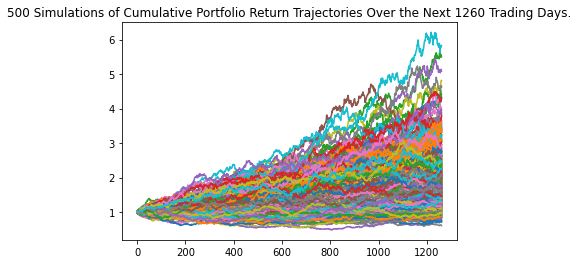

In [32]:
# Plot simulation outcomes
line5_plot = MC_5y_80stocks.plot_simulation()

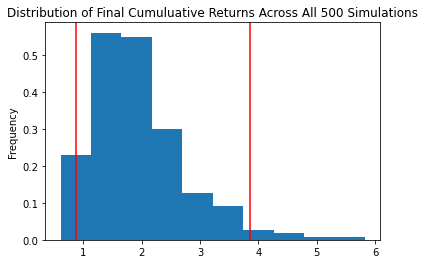

In [33]:
# Plot probability distribution and confidence intervals
dist5_plot = MC_5y_80stocks.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
summary5_tbl = MC_5y_80stocks.summarize_cumulative_return()

# Print summary statistics
print(summary5_tbl)

count           500.000000
mean              1.942002
std               0.789713
min               0.607059
25%               1.391588
50%               1.793868
75%               2.309247
max               5.824754
95% CI Lower      0.870211
95% CI Upper      3.850844
Name: 1260, dtype: float64


In [35]:
# Set initial investment
initial_invest_5y = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5y = round(summary5_tbl[8] * initial_invest_5y,2)
ci_upper_5y = round(summary5_tbl[9] * initial_invest_5y,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5y} and ${ci_upper_5y}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $52212.69 and $231050.63


### Ten Years Retirement Option

In [36]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# For 10y projection, I switched back the risk profile to 60% stocks

MC_10y_60stocks = MCSimulation(
    portfolio_data= df_stock_data,
    weights=[.40, .60],
    num_simulation= 500,
    num_trading_days= 252 * 10
)

In [37]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10y_60stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991754,1.013910,0.997932,1.001350,1.004690,0.979748,1.017805,1.011980,1.002195,0.999192,...,0.994625,0.998489,1.003692,0.999308,1.000264,0.999540,1.005879,0.995333,1.004081,1.014326
2,0.994735,1.019962,0.998441,1.026918,1.029791,0.984397,1.003722,1.018169,0.994603,1.007707,...,1.007518,0.990285,1.004982,0.998791,0.994371,0.996112,1.004633,0.993115,1.011396,1.009219
3,0.994703,1.012752,0.986869,1.025110,1.024481,0.981243,0.989455,1.015945,1.008343,1.005015,...,1.021315,0.993486,1.009499,1.008715,1.010805,0.996630,1.002004,0.990898,1.016947,1.008162
4,0.998138,0.996305,0.987101,1.017953,1.010778,0.984536,0.999821,1.039922,0.998797,1.014877,...,1.020204,1.004773,1.007146,1.011797,1.020525,0.995786,1.003561,0.995464,1.028595,0.996279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.475428,2.434435,3.544073,3.180385,4.503444,2.427092,2.534911,2.667107,1.800729,1.642717,...,1.945007,2.851250,3.137604,2.015793,1.262054,1.807059,8.635056,2.459895,4.265394,1.380204
2517,1.467145,2.452079,3.553086,3.164726,4.598493,2.425458,2.515448,2.682293,1.775886,1.630567,...,1.931171,2.829339,3.126448,2.022454,1.261833,1.791441,8.642772,2.455322,4.275055,1.381812
2518,1.462585,2.464141,3.588624,3.141450,4.616600,2.432714,2.497928,2.698383,1.773147,1.620479,...,1.924900,2.857519,3.129962,1.999617,1.258179,1.796978,8.574978,2.488927,4.258440,1.372090
2519,1.467456,2.444830,3.575717,3.157325,4.649233,2.431787,2.478900,2.657863,1.764276,1.610895,...,1.942992,2.870292,3.156843,1.999287,1.275977,1.774697,8.628282,2.493372,4.239488,1.356747


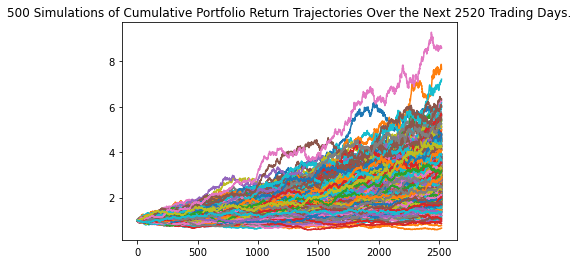

In [38]:
# Plot simulation outcomes
line10_plot = MC_10y_60stocks.plot_simulation()

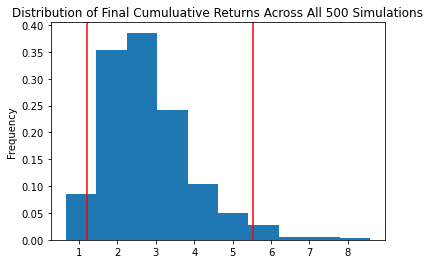

In [39]:
# Plot probability distribution and confidence intervals
dist10_plot = MC_10y_60stocks.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
summary10_tbl = MC_10y_60stocks.summarize_cumulative_return()

# Print summary statistics
print(summary10_tbl)

count           500.000000
mean              2.828770
std               1.127981
min               0.653093
25%               2.027578
50%               2.616119
75%               3.409609
max               8.582595
95% CI Lower      1.202309
95% CI Upper      5.536615
Name: 2520, dtype: float64


In [41]:
# Set initial investment
initial_invest_10y = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10y = round(summary10_tbl[8] * initial_invest_10y,2)
ci_upper_10y = round(summary10_tbl[9] * initial_invest_10y,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10y} and ${ci_upper_10y}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $72138.54 and $332196.92
